## Transcriptomic Profile of  Memory CD4 T Cells in Latent TB: An Analysis in Principal Components Analysis

Kathleen Ashbaker
PABIO 536 
Spring 2024


NCBI Gene Expression Omninus Series GSE99373

Publication: 
Burel JG, Lindestam Arlehamn CS, Khan N, Seumois G et al. Transcriptomic Analysis of CD4(+) T Cells Reveals Novel Immune Signatures of Latent Tuberculosis. J Immunol 2018 May 1;200(9):3283-3290. PMID: 29602771
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE99373. 

Import necessary packages: 

In [1]:
# Start with importing the packages
%matplotlib inline
#pip install umap-learn[plot]
#pip install scanpy
#pip3 install igraph

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE
from   sklearn.preprocessing import StandardScaler
import h5py
from umap import UMAP
import umap.plot
import scanpy as sc
import anndata as ad

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import scipy
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)

plt_style = 'seaborn-notebook'
pd.set_option('styler.format.precision', 2)
pd.set_option('styler.render.max_columns',10)

1. Upload  data and remember to log-2 transform and remove zeroes. 

In [2]:
# upload data set 'GSE99373_RawCounts_CD4_CSV.csv' 


import pandas as pd

path = r"C:\Users\Kathleen\OneDrive\Documents\Bioinformatics Spring 2024\Final Project\GSE99373_RawCounts_CD4_CSV.csv"
data = pd.read_csv(path, index_col=0)
data.shape

(21920, 39)

In [3]:
# Sanity check of data frame 

data

,TU0094_CD4_HC,TU0110_CD4_HC,XT0082_CD4_HC,XT0101_CD4_HC,XT0106_CD4_HC,XT0123_CD4_HC,TU0079_CD4_HC,TU0119_CD4_HC,TU0146_CD4_HC,XT0103_CD4_HC,...,TU0046_CD4_LTBI,TU0063_CD4_LTBI,TU0070_CD4_LTBI,TU0075_CD4_LTBI,XT0134_CD4_LTBI,TP0004_CD4_LTBI,TP0008_CD4_LTBI,TP0001_CD4_LTBI,TP0003_CD4_LTBI,TP0007_CD4_LTBI
Transcript_ID,,,,,,,,,,,,,,,,,,,,,
MARCH1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MARC1,61,72,21,18,21,4,5,21,35,41,...,44,58,18,1,32,7,1,12,13,0
MARCH2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MARC2,818,451,506,892,468,196,438,1915,1371,1422,...,725,1375,641,585,666,80,126,712,633,1378
MARCH3,93,98,16,147,22,4,51,148,162,240,...,63,51,40,28,64,4,7,16,30,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,12,4,7,8,1,0,5,11,15,11,...,18,13,3,10,8,0,2,4,5,7
ZYG11B,550,430,238,280,261,80,308,786,692,845,...,361,547,428,360,318,52,103,303,318,549
ZYX,3359,1806,1488,2505,1523,568,3446,6276,5595,7615,...,3334,5552,2412,1771,1754,470,527,3434,2631,7851


In [4]:
# transpose the data so that the healthy control and the disease samples are in the rows and the genes are in the columns
data = data.transpose()


In [5]:
# Sanity Check of transposed data frame 
data

Transcript_ID,MARCH1,MARC1,MARCH2,MARC2,MARCH3,MARCH4,MARCH5,MARCH6,MARCH7,MARCH8,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TU0094_CD4_HC,0,61,0,818,93,0,658,2215,2461,186,...,172,72,101,273,699,12,550,3359,499,757
TU0110_CD4_HC,3,72,0,451,98,0,363,1540,1767,161,...,88,104,62,277,588,4,430,1806,287,610
XT0082_CD4_HC,0,21,0,506,16,0,279,1377,1603,141,...,56,72,44,167,234,7,238,1488,247,514
XT0101_CD4_HC,0,18,0,892,147,0,500,2130,1961,191,...,108,195,53,245,216,8,280,2505,394,968
XT0106_CD4_HC,0,21,0,468,22,0,135,862,1210,98,...,95,72,67,170,139,1,261,1523,156,537
XT0123_CD4_HC,0,4,0,196,4,0,93,354,357,25,...,64,17,44,111,153,0,80,568,53,112
TU0079_CD4_HC,0,5,0,438,51,0,386,982,1241,131,...,135,83,103,259,522,5,308,3446,255,345
TU0119_CD4_HC,0,21,0,1915,148,0,911,2261,2711,305,...,236,147,162,687,1483,11,786,6276,520,691
TU0146_CD4_HC,0,35,0,1371,162,0,561,1643,2844,274,...,236,76,132,439,486,15,692,5595,419,819
XT0103_CD4_HC,0,41,0,1422,240,0,1039,2715,3478,401,...,334,348,182,537,1483,11,845,7615,657,1163


In [6]:
#Save the sample metadata to its own dataframe
HCLTBI_metadata = pd.DataFrame(index=data.index.values)
HCLTBI_metadata.index.name = 'cell_lines' #name the index column

In [7]:
# Sanity check of metadata
HCLTBI_metadata

""
cell_lines
TU0094_CD4_HC
TU0110_CD4_HC
XT0082_CD4_HC
XT0101_CD4_HC
XT0106_CD4_HC
XT0123_CD4_HC
TU0079_CD4_HC
TU0119_CD4_HC
TU0146_CD4_HC


In [8]:
data_log2 = np.log2(data + 0.5) # log2 transformation of the data

In [9]:
#Sanity check of log2 transformed data
data_log2

Transcript_ID,MARCH1,MARC1,MARCH2,MARC2,MARCH3,MARCH4,MARCH5,MARCH6,MARCH7,MARCH8,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TU0094_CD4_HC,-1.000000,5.942515,-1.000000,9.676839,6.546894,-1.000000,9.363040,11.113417,11.265322,7.543032,...,7.430453,6.179909,6.665336,8.095397,9.450180,3.643856,9.104599,11.714031,8.964341,9.565102
TU0110_CD4_HC,1.807355,6.179909,-1.000000,8.818582,6.622052,-1.000000,8.505812,10.589183,10.787494,7.335390,...,6.467606,6.707359,5.965784,8.116344,9.200899,2.169925,8.749869,10.818982,8.167418,9.253847
XT0082_CD4_HC,-1.000000,4.426265,-1.000000,8.984418,4.044394,-1.000000,8.126704,10.427837,10.647009,7.144658,...,5.820179,6.179909,5.475733,7.388017,7.873444,2.906891,7.897845,10.539644,7.951285,9.007027
XT0101_CD4_HC,-1.000000,4.209453,-1.000000,9.801708,7.204571,-1.000000,8.967226,11.056976,10.937742,7.581201,...,6.761551,7.611025,5.741467,7.939579,7.758223,3.087463,8.131857,11.290883,8.623881,9.919608
XT0106_CD4_HC,-1.000000,4.426265,-1.000000,8.871905,4.491853,-1.000000,7.082149,9.752381,10.241387,6.622052,...,6.577429,6.179909,6.076816,7.413628,7.124121,0.584963,8.030667,10.573174,7.290019,9.070121
XT0123_CD4_HC,-1.000000,2.169925,-1.000000,7.618386,2.169925,-1.000000,6.546894,8.469642,8.481799,4.672425,...,6.011227,4.129283,5.475733,6.800900,7.262095,-1.000000,6.330917,9.151017,5.741467,6.813781
TU0079_CD4_HC,-1.000000,2.459432,-1.000000,8.776433,5.686501,-1.000000,8.594325,9.940314,10.277869,7.038919,...,7.082149,6.383704,6.693487,8.019591,9.029287,2.459432,8.269127,11.750916,7.997179,8.432542
TU0119_CD4_HC,-1.000000,4.426265,-1.000000,10.903505,7.214319,-1.000000,9.832099,11.143064,11.404875,8.255029,...,7.885696,7.204571,7.344296,9.425216,10.534789,3.523562,9.619303,12.615745,9.023754,9.433585
TU0146_CD4_HC,-1.000000,5.149747,-1.000000,10.421539,7.344296,-1.000000,9.133142,10.682556,11.473959,8.100662,...,7.885696,6.257388,7.049849,8.779719,8.926296,3.954196,9.435670,12.450051,8.712527,9.678600
XT0103_CD4_HC,-1.000000,5.375039,-1.000000,10.474213,7.909893,-1.000000,10.021674,11.407002,11.764250,8.649256,...,8.385862,8.445015,7.511753,9.070121,10.534789,3.523562,9.723661,12.894723,9.360847,10.184255


In [10]:
# Keep only genes with mean > 1 and variability > 1
filtered_data = data_log2.loc[:, (data_log2.mean() > 1) & (data_log2.var() > 1)]
filtered_data

# Extracting gene expression data for the healthy control and disease samples


filtered_data_HC = filtered_data.loc[filtered_data.index.str.contains('HC'), 'MARC1':]
filtered_data_LTBI = filtered_data.loc[filtered_data.index.str.contains('LTBI'), 'MARC1':]



In [11]:
# Sanity check of the filtered data 
filtered_data

Transcript_ID,MARC1,MARCH3,MARCH9,MARCH10,SEPT4,SEPT10,SEPT14,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A
TU0094_CD4_HC,5.942515,6.546894,7.854868,3.392317,3.857981,5.599913,3.247928,5.266787,7.016808,3.754888,...,4.554589,3.857981,2.169925,7.550747,8.197217,7.430453,6.179909,6.665336,9.450180,3.643856
TU0110_CD4_HC,6.179909,6.622052,7.271463,2.459432,4.209453,1.807355,3.392317,4.614710,6.400879,2.459432,...,-1.000000,4.129283,3.523562,6.876517,6.679480,6.467606,6.707359,5.965784,9.200899,2.169925
XT0082_CD4_HC,4.426265,4.044394,6.276124,4.614710,4.209453,5.599913,2.459432,5.022368,6.033423,3.087463,...,4.129283,3.392317,4.285402,6.774787,7.829723,5.820179,6.179909,5.475733,7.873444,2.906891
XT0101_CD4_HC,4.209453,7.204571,6.033423,2.169925,4.357552,6.562242,2.906891,5.339850,7.326429,3.392317,...,3.392317,1.321928,3.392317,6.924813,7.535275,6.761551,7.611025,5.741467,7.758223,3.087463
XT0106_CD4_HC,4.426265,4.491853,6.451211,2.906891,-1.000000,5.189825,2.169925,4.491853,6.434628,1.321928,...,4.672425,4.426265,4.781360,6.294621,5.475733,6.577429,6.179909,6.076816,7.124121,0.584963
XT0123_CD4_HC,2.169925,2.169925,5.189825,1.321928,-1.000000,2.459432,-1.000000,0.584963,4.614710,1.807355,...,-1.000000,-1.000000,2.700440,3.954196,3.523562,6.011227,4.129283,5.475733,7.262095,-1.000000
TU0079_CD4_HC,2.459432,5.686501,6.971544,1.807355,2.169925,4.209453,2.459432,4.209453,6.994353,2.169925,...,3.954196,2.906891,3.523562,5.918863,7.879583,7.082149,6.383704,6.693487,9.029287,2.459432
TU0119_CD4_HC,4.426265,7.214319,9.040290,3.754888,5.741467,6.900867,4.129283,4.930737,8.273796,4.882643,...,3.954196,6.033423,5.714246,7.184875,8.753217,7.885696,7.204571,7.344296,10.534789,3.523562
TU0146_CD4_HC,5.149747,7.344296,7.463524,5.108524,3.754888,7.980140,4.044394,5.303781,7.903882,4.614710,...,5.409391,4.129283,3.392317,6.076816,7.413628,7.885696,6.257388,7.049849,8.926296,3.954196
XT0103_CD4_HC,5.375039,7.909893,8.283088,5.442943,4.357552,7.951285,4.426265,5.942515,7.991522,2.906891,...,6.839204,5.686501,6.276124,7.764872,8.677720,8.385862,8.445015,7.511753,10.534789,3.523562


In [12]:
# Sanity check of the filtered data for healthy control samples
filtered_data_HC

Transcript_ID,MARC1,MARCH3,MARCH9,MARCH10,SEPT4,SEPT10,SEPT14,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A
TU0094_CD4_HC,5.942515,6.546894,7.854868,3.392317,3.857981,5.599913,3.247928,5.266787,7.016808,3.754888,...,4.554589,3.857981,2.169925,7.550747,8.197217,7.430453,6.179909,6.665336,9.450180,3.643856
TU0110_CD4_HC,6.179909,6.622052,7.271463,2.459432,4.209453,1.807355,3.392317,4.614710,6.400879,2.459432,...,-1.000000,4.129283,3.523562,6.876517,6.679480,6.467606,6.707359,5.965784,9.200899,2.169925
XT0082_CD4_HC,4.426265,4.044394,6.276124,4.614710,4.209453,5.599913,2.459432,5.022368,6.033423,3.087463,...,4.129283,3.392317,4.285402,6.774787,7.829723,5.820179,6.179909,5.475733,7.873444,2.906891
XT0101_CD4_HC,4.209453,7.204571,6.033423,2.169925,4.357552,6.562242,2.906891,5.339850,7.326429,3.392317,...,3.392317,1.321928,3.392317,6.924813,7.535275,6.761551,7.611025,5.741467,7.758223,3.087463
XT0106_CD4_HC,4.426265,4.491853,6.451211,2.906891,-1.000000,5.189825,2.169925,4.491853,6.434628,1.321928,...,4.672425,4.426265,4.781360,6.294621,5.475733,6.577429,6.179909,6.076816,7.124121,0.584963
XT0123_CD4_HC,2.169925,2.169925,5.189825,1.321928,-1.000000,2.459432,-1.000000,0.584963,4.614710,1.807355,...,-1.000000,-1.000000,2.700440,3.954196,3.523562,6.011227,4.129283,5.475733,7.262095,-1.000000
TU0079_CD4_HC,2.459432,5.686501,6.971544,1.807355,2.169925,4.209453,2.459432,4.209453,6.994353,2.169925,...,3.954196,2.906891,3.523562,5.918863,7.879583,7.082149,6.383704,6.693487,9.029287,2.459432
TU0119_CD4_HC,4.426265,7.214319,9.040290,3.754888,5.741467,6.900867,4.129283,4.930737,8.273796,4.882643,...,3.954196,6.033423,5.714246,7.184875,8.753217,7.885696,7.204571,7.344296,10.534789,3.523562
TU0146_CD4_HC,5.149747,7.344296,7.463524,5.108524,3.754888,7.980140,4.044394,5.303781,7.903882,4.614710,...,5.409391,4.129283,3.392317,6.076816,7.413628,7.885696,6.257388,7.049849,8.926296,3.954196
XT0103_CD4_HC,5.375039,7.909893,8.283088,5.442943,4.357552,7.951285,4.426265,5.942515,7.991522,2.906891,...,6.839204,5.686501,6.276124,7.764872,8.677720,8.385862,8.445015,7.511753,10.534789,3.523562


In [13]:
# Sanity check of the filtered data for latent- TB  samples
filtered_data_LTBI

Transcript_ID,MARC1,MARCH3,MARCH9,MARCH10,SEPT4,SEPT10,SEPT14,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A
TP0005_CD4_LTBI,5.870365,4.781360,8.415742,4.781360,3.392317,6.577429,3.247928,3.087463,7.005625,2.169925,...,3.643856,4.614710,5.228819,6.839204,7.581201,7.174926,5.507795,5.741467,9.070121,3.247928
TP0013_CD4_LTBI,6.257388,4.554589,8.036174,3.087463,5.409391,7.082149,3.754888,4.727920,7.016808,2.700440,...,5.539159,3.087463,4.357552,7.252665,8.319672,7.550747,7.154818,6.800900,9.078151,4.129283
TP0015_CD4_LTBI,2.459432,4.044394,7.174926,0.584963,4.285402,5.375039,2.459432,3.643856,6.651052,2.700440,...,3.392317,4.357552,4.614710,5.870365,7.252665,6.483816,5.409391,5.894818,7.471675,3.523562
TU0005_CD4_LTBI,2.906891,5.066089,7.717676,5.507795,5.339850,6.607330,3.392317,5.375039,7.262095,2.906891,...,4.614710,5.303781,5.870365,7.174926,8.306062,6.839204,6.761551,7.184875,8.865733,3.087463
TU0010_CD4_LTBI,4.554589,4.727920,7.405141,2.459432,5.686501,4.672425,3.247928,3.954196,6.636625,3.247928,...,2.169925,3.392317,2.169925,6.748193,6.734710,5.942515,5.108524,5.894818,8.847057,1.321928
TU0013_CD4_LTBI,6.199672,5.539159,8.319672,4.882643,5.189825,7.271463,3.954196,4.209453,7.717676,3.857981,...,5.022368,4.882643,3.754888,6.948367,7.778077,7.243174,6.294621,5.569856,9.785452,3.392317
TU0022_CD4_LTBI,2.906891,5.507795,7.997179,3.857981,6.417853,5.539159,1.321928,4.426265,7.618386,3.392317,...,1.807355,5.375039,4.491853,6.876517,7.915879,6.451211,4.554589,6.467606,8.659996,1.321928
TU0024_CD4_LTBI,6.011227,6.982994,8.789534,4.781360,5.189825,6.098032,3.523562,5.303781,7.430453,4.129283,...,3.857981,3.754888,5.988685,7.519636,7.927778,7.071462,6.936638,7.430453,9.957828,3.857981
TU0033_CD4_LTBI,4.554589,4.491853,7.519636,4.426265,5.266787,3.857981,3.087463,5.149747,7.791163,4.357552,...,5.409391,4.491853,-1.000000,7.113742,7.060696,6.451211,7.060696,6.118941,8.346514,2.459432
TU0035_CD4_LTBI,3.087463,5.339850,7.519636,3.392317,5.442943,4.832890,3.643856,4.044394,7.527477,4.209453,...,4.882643,5.022368,5.442943,6.994353,7.326429,7.038919,6.948367,7.233620,9.286558,4.285402


## PCA FOR HEALTHY CONTROL SAMPLES 

In [14]:
# PCA for the Healthy Control Samples 

#For PCA, we need to scale and center the data
#The mean of each gene expression is set to 0 and the standard deviation to 1
data_tobe_scaledHC = StandardScaler().fit_transform(filtered_data_HC.loc[:, 'MARC1':])

In [15]:
data_tobe_scaledHC

array([[ 1.1534,  0.5123,  0.6492, ..., -0.1109,  0.4921,  1.1029],
       [ 1.2695,  0.5611,  0.0964, ..., -1.0535,  0.2577,  0.003 ],
       [ 0.4117, -1.1127, -0.8467, ..., -1.7138, -0.9906,  0.553 ],
       ...,
       [ 0.5321,  0.6343, -1.876 , ...,  1.0403, -1.5567, -0.2676],
       [ 0.6106, -0.5372,  0.821 , ..., -0.5858,  0.6198,  0.003 ],
       [ 0.4117,  0.6688,  0.661 , ...,  0.6933,  0.7857, -2.3625]])

In [16]:
# Summarizing the parameters of the scaled HC data
pd.DataFrame(data=data_tobe_scaledHC).describe()

,0,1,2,3,4,5,6,7,8,9,...,7378,7379,7380,7381,7382,7383,7384,7385,7386,7387
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,...,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01
mean,-2.220446e-16,-2.921640e-17,9.115515e-16,-2.571043e-16,9.933574e-17,7.070368e-16,3.257628e-16,3.155371e-16,-1.501723e-15,-5.105565e-16,...,4.674623e-17,-5.258951e-17,1.168656e-17,3.389102e-16,-1.138709e-15,-3.155371e-16,-1.519253e-16,-8.297456e-16,-1.764670e-15,-9.349247e-17
std,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,...,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00
min,-2.242683e+00,-2.329989e+00,-1.876001e+00,-1.590381e+00,-2.162875e+00,-2.276468e+00,-3.146012e+00,-3.753393e+00,-2.902614e+00,-1.806799e+00,...,-1.520041e+00,-2.354181e+00,-2.316907e+00,-1.933627e+00,-3.126194e+00,-2.015760e+00,-2.512642e+00,-1.713803e+00,-1.695259e+00,-2.362500e+00
25%,-3.968231e-01,-5.371734e-01,-7.637549e-01,-4.341902e-01,-4.704586e-01,-5.527230e-01,-2.407283e-01,-2.215332e-01,-4.804642e-01,-7.305424e-01,...,-7.387867e-01,-2.428909e-01,-6.011540e-01,-4.291024e-01,-2.034677e-01,-6.800669e-01,-4.569552e-01,-9.331011e-01,-1.044779e+00,-2.675552e-01
50%,4.116868e-01,6.647853e-03,2.783868e-01,1.322234e-01,1.249549e-01,2.906148e-01,1.350546e-01,1.959602e-01,-1.867021e-02,1.072459e-01,...,3.372076e-01,2.710800e-01,-5.754672e-02,7.591476e-02,1.582543e-01,1.909327e-01,-1.696402e-01,3.171760e-01,2.985966e-01,3.007092e-03
75%,5.713487e-01,8.041205e-01,7.409703e-01,6.870185e-01,6.678351e-01,6.529509e-01,4.820930e-01,5.094700e-01,4.098113e-01,5.740923e-01,...,6.888979e-01,5.781815e-01,8.036507e-01,7.508352e-01,5.971433e-01,7.788341e-01,6.537206e-01,8.509746e-01,6.650152e-01,6.203309e-01
max,1.269518e+00,1.397430e+00,1.772412e+00,1.617846e+00,1.332910e+00,1.329612e+00,1.411048e+00,1.014904e+00,1.841206e+00,2.053430e+00,...,1.615145e+00,1.446693e+00,1.317261e+00,1.538195e+00,1.046006e+00,1.478440e+00,2.238894e+00,1.325518e+00,1.512100e+00,1.334492e+00


In [17]:
#Now, we calculate the PCA transform and apply it to the HC Data 

# Setting up the PCA model
HCPCA = PCA().fit(data_tobe_scaledHC)

# PCA transform data
HC_pca_data = HCPCA.transform(data_tobe_scaledHC)

# We can see how much variation each PC captures
print(HCPCA.explained_variance_ratio_)

[0.4241 0.0821 0.0498 0.0488 0.043  0.0425 0.0396 0.0365 0.0332 0.0324
 0.0302 0.0255 0.023  0.0217 0.0196 0.0175 0.016  0.0145 0.    ]


## PLOT PCA FOR HC

In [18]:
#Save the HC sample metadata to its own dataframe
HC_metadata = pd.DataFrame(index=data.index.values)
HC_metadata.index.name = 'cell_lines' #name the index column

In [19]:
HC_metadata

""
cell_lines
TU0094_CD4_HC
TU0110_CD4_HC
XT0082_CD4_HC
XT0101_CD4_HC
XT0106_CD4_HC
XT0123_CD4_HC
TU0079_CD4_HC
TU0119_CD4_HC
TU0146_CD4_HC


In [20]:
# This function helps us to draw the principal component axes on the plots below
def draw_vector(v0, v1, ax=None):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

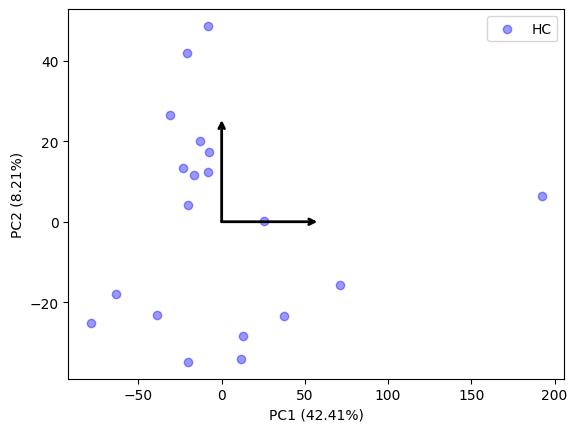

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def draw_vector(v0, v1, ax=None):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Convert HC_metadata.index to a list of indices
hc_indices = HC_metadata.index[HC_metadata.index.str.contains('CD4_HC')]

fig = plt.figure()
ax = fig.add_subplot(111)

# Filter and plot the data for 'CD4_HC'
hc_indices = np.where(HC_metadata.index.str.contains('CD4_HC'))[0]
ax.scatter(HC_pca_data[hc_indices, 0],
           HC_pca_data[hc_indices, 1], alpha=0.4, c='b', label="HC")

# Drawing the PC1 vector length proportional to the explained variance
draw_vector([0, 0], [np.sqrt(HCPCA.explained_variance_[0]), 0], ax=ax)
# Drawing the PC2 vector length proportional to the explained variance
draw_vector([0, 0], [0, np.sqrt(HCPCA.explained_variance_[1])], ax=ax)

ax.set_xlabel('PC1 ({0:.2f}%)'.format(HCPCA.explained_variance_ratio_[0] * 100))
ax.set_ylabel('PC2 ({0:.2f}%)'.format(HCPCA.explained_variance_ratio_[1] * 100))

plt.legend(loc="best")
plt.show()


## PCA FOR LTBI SAMPLES 

In [22]:
# PCA for the Latent TB Infection Samples 

#For PCA, we need to scale and center the data
#The mean of each gene expression is set to 0 and the standard deviation to 1
data_tobe_scaledLTBI = StandardScaler().fit_transform(filtered_data_LTBI.loc[:, 'MARC1':])

In [23]:
data_tobe_scaledLTBI

array([[ 1.0432, -0.1579,  0.957 , ..., -0.227 ,  0.3677,  0.4033],
       [ 1.2375, -0.3688,  0.5852, ...,  0.5319,  0.3758,  1.0987],
       [-0.6698, -0.8433, -0.2584, ..., -0.1172, -1.2417,  0.6208],
       ...,
       [-0.0749, -0.8433,  0.0323, ..., -0.227 , -0.9871, -0.4473],
       [-0.0192, -0.019 , -0.298 , ..., -0.3719,  0.7914, -0.2189],
       [-2.407 ,  1.0468,  0.7573, ...,  1.0579,  1.1618,  0.1342]])

In [24]:
# Summarizing the parameters of the scaled data
pd.DataFrame(data=data_tobe_scaledLTBI).describe()

,0,1,2,3,4,5,6,7,8,9,...,7378,7379,7380,7381,7382,7383,7384,7385,7386,7387
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-4.662937e-16,-3.663736e-16,-1.260103e-15,-2.220446e-17,-3.774758e-16,1.348574e-15,1.498801e-16,-1.929013e-16,-1.110223e-17,-2.331468e-16,...,-8.881784e-17,-8.326673e-17,1.443290e-16,-1.110223e-17,9.769963e-16,-6.661338e-17,8.881784e-17,5.107026e-16,7.438494e-16,-3.053113e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,...,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.407037e+00,-2.586396e+00,-2.886344e+00,-2.838993e+00,-2.522163e+00,-2.663237e+00,-2.528613e+00,-3.211963e+00,-2.905024e+00,-3.393180e+00,...,-2.815724e+00,-2.704320e+00,-2.324856e+00,-2.544076e+00,-3.114681e+00,-3.437184e+00,-2.330360e+00,-3.045085e+00,-2.522478e+00,-2.948606e+00
25%,-4.450433e-01,-3.834030e-01,-8.923377e-02,-3.617347e-01,-5.360789e-01,-4.929354e-01,-5.235993e-01,-2.404577e-01,-2.012942e-01,-3.100298e-01,...,-3.291202e-01,-3.051367e-01,-2.111253e-01,-5.428172e-01,-1.947465e-01,-1.014959e-01,-4.419175e-01,-2.270051e-01,-2.896047e-01,-5.188574e-01
50%,9.494930e-02,4.390901e-02,1.347990e-01,2.344900e-01,3.126699e-01,1.086875e-02,3.449434e-01,4.224429e-02,1.758976e-01,1.194525e-01,...,6.121885e-02,3.887025e-01,2.589938e-01,3.343318e-01,2.481148e-01,2.484901e-01,5.376158e-01,1.682644e-01,2.648328e-01,2.766606e-01
75%,8.945434e-01,5.810207e-01,6.282435e-01,7.655431e-01,5.520363e-01,7.041420e-01,6.313646e-01,3.439421e-01,5.926536e-01,6.579044e-01,...,6.944285e-01,6.064963e-01,7.076632e-01,7.061281e-01,5.694798e-01,5.175263e-01,7.175782e-01,6.006492e-01,5.868180e-01,6.664029e-01
max,1.237536e+00,1.889436e+00,1.323111e+00,1.200764e+00,1.475002e+00,1.604939e+00,1.588508e+00,1.849381e+00,1.165536e+00,1.491941e+00,...,1.376213e+00,9.305595e-01,1.043054e+00,1.094974e+00,1.069094e+00,9.568125e-01,1.030731e+00,1.057934e+00,1.261548e+00,1.221910e+00


In [25]:
#Now, we calculate the PCA transform and apply it to the LTBI Data 

# Setting up the PCA model
LTBIPCA = PCA().fit(data_tobe_scaledLTBI)

# PCA transform data
LTBI_pca_data = LTBIPCA.transform(data_tobe_scaledLTBI)

# We can see how much variation each PC captures
print(LTBIPCA.explained_variance_ratio_)

[0.5476 0.0487 0.0443 0.0398 0.0336 0.0288 0.0273 0.0244 0.0231 0.0224
 0.0218 0.0205 0.0183 0.0181 0.0171 0.0169 0.0161 0.0159 0.0153 0.    ]


In [26]:
#Save the LTBI sample metadata to its own dataframe
LTBI_metadata = pd.DataFrame(index=data.index.values)
LTBI_metadata.index.name = 'cell_lines' #name the index column

In [27]:
LTBI_metadata

""
cell_lines
TU0094_CD4_HC
TU0110_CD4_HC
XT0082_CD4_HC
XT0101_CD4_HC
XT0106_CD4_HC
XT0123_CD4_HC
TU0079_CD4_HC
TU0119_CD4_HC
TU0146_CD4_HC


## PLOT PCA FOR LTB

In [28]:
# This function helps us to draw the principal component axes on the plots below
def draw_vector(v0, v1, ax=None):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

                      cell_lines
cell_lines                      
TP0005_CD4_LTBI  TP0005_CD4_LTBI
TP0013_CD4_LTBI  TP0013_CD4_LTBI
TP0015_CD4_LTBI  TP0015_CD4_LTBI
TU0005_CD4_LTBI  TU0005_CD4_LTBI
TU0010_CD4_LTBI  TU0010_CD4_LTBI
TU0013_CD4_LTBI  TU0013_CD4_LTBI
TU0022_CD4_LTBI  TU0022_CD4_LTBI
TU0024_CD4_LTBI  TU0024_CD4_LTBI
TU0033_CD4_LTBI  TU0033_CD4_LTBI
TU0035_CD4_LTBI  TU0035_CD4_LTBI
TU0046_CD4_LTBI  TU0046_CD4_LTBI
TU0063_CD4_LTBI  TU0063_CD4_LTBI
TU0070_CD4_LTBI  TU0070_CD4_LTBI
TU0075_CD4_LTBI  TU0075_CD4_LTBI
XT0134_CD4_LTBI  XT0134_CD4_LTBI
TP0004_CD4_LTBI  TP0004_CD4_LTBI
TP0008_CD4_LTBI  TP0008_CD4_LTBI
TP0001_CD4_LTBI  TP0001_CD4_LTBI
TP0003_CD4_LTBI  TP0003_CD4_LTBI
TP0007_CD4_LTBI  TP0007_CD4_LTBI


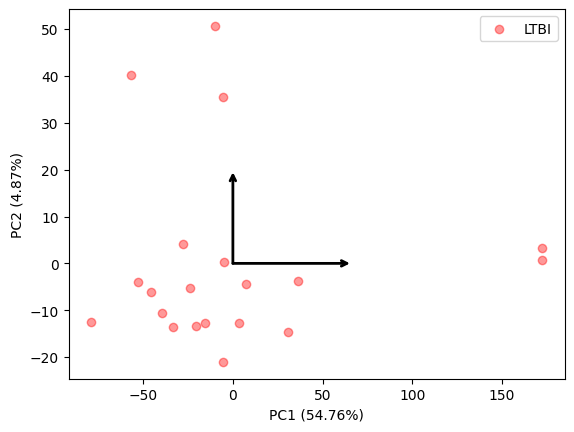

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def draw_vector(v0, v1, ax=None):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Assuming 'data' has a 'cell_lines' column to extract from
LTBI_metadata = pd.DataFrame(index=data.index.values)
LTBI_metadata.index.name = 'cell_lines' # Name the index column
LTBI_metadata['cell_lines'] = data.index  # Copy the index to the 'cell_lines' column

# Filter for 'CD4_LTBI'
LTBI_metadata = LTBI_metadata[LTBI_metadata['cell_lines'].str.contains('CD4_LTBI')]

# Verify the filtered LTBI_metadata
print(LTBI_metadata)

# Convert LTBI_metadata.index to a list of indices
ltbi_indices = LTBI_metadata.index

fig = plt.figure()
ax = fig.add_subplot(111)

# Assuming LTBI_pca_data is a numpy array and using boolean indexing
ltbi_indices = np.where(LTBI_metadata['cell_lines'].str.contains('CD4_LTBI'))[0]

# Plotting the data for 'CD4_LTBI'
ax.scatter(LTBI_pca_data[ltbi_indices, 0],
           LTBI_pca_data[ltbi_indices, 1], alpha=0.4, c='r', label="LTBI")

# Drawing the PC1 vector length proportional to the explained variance
draw_vector([0, 0], [np.sqrt(LTBIPCA.explained_variance_[0]), 0], ax=ax)
# Drawing the PC2 vector length proportional to the explained variance
draw_vector([0, 0], [0, np.sqrt(LTBIPCA.explained_variance_[1])], ax=ax)

ax.set_xlabel('PC1 ({0:.2f}%)'.format(LTBIPCA.explained_variance_ratio_[0] * 100))
ax.set_ylabel('PC2 ({0:.2f}%)'.format(LTBIPCA.explained_variance_ratio_[1] * 100))

plt.legend(loc="best")
plt.show()


## PCA for Both HC and LTB as well as Genes of Interest 

In [30]:
#For PCA, we need to scale and center the data
#The mean of each gene expression is set to 0 and the standard deviation to 1
data_tobe_scaled = StandardScaler().fit_transform(filtered_data.loc[:, 'MARC1':])

In [31]:
data_tobe_scaled

array([[ 1.1144,  0.87  ,  0.5229, ...,  0.2303,  0.6162,  0.8883],
       [ 1.2319,  0.9244, -0.0346, ..., -0.3638,  0.3751, -0.2164],
       [ 0.3637, -0.9403, -0.9857, ..., -0.78  , -0.9087,  0.3359],
       ...,
       [-0.0236, -0.9403,  0.1567, ..., -0.5543, -1.0528, -0.2164],
       [ 0.0314, -0.2991, -0.1655, ..., -0.7261,  0.6556,  0.0006],
       [-2.3226,  0.53  ,  0.864 , ...,  0.9691,  1.0114,  0.3359]])

In [32]:
# Summarizing the parameters of the scaled data
pd.DataFrame(data=data_tobe_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,7378,7379,7380,7381,7382,7383,7384,7385,7386,7387
count,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,...,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,-4.782499e-16,1.366428e-16,2.846726e-17,-5.351844e-16,6.405133e-16,8.412074e-16,8.540177e-18,-1.337961e-16,-2.789791e-16,-2.562053e-16,...,7.401487e-17,6.547469e-17,-2.476651e-16,1.060405e-15,6.803674e-16,2.903660e-16,4.896368e-16,6.091993e-16,-3.353443e-15,1.224092e-16
std,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,...,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00
min,-2.322592e+00,-2.296301e+00,-2.690575e+00,-2.008994e+00,-3.004719e+00,-2.593716e+00,-3.612972e+00,-3.326686e+00,-3.432333e+00,-3.710180e+00,...,-1.971573e+00,-2.513717e+00,-2.311132e+00,-2.420706e+00,-3.375659e+00,-4.038984e+00,-2.883068e+00,-3.895472e+00,-2.527562e+00,-2.592434e+00
25%,-3.884538e-01,-5.085335e-01,-5.465229e-01,-5.633520e-01,-3.568886e-01,-4.978792e-01,-3.266600e-01,-3.520383e-01,-3.236547e-01,-3.770219e-01,...,-6.194933e-01,-2.578272e-01,-4.881901e-01,-4.750193e-01,-3.162870e-01,-4.302825e-01,-4.567287e-01,-4.240748e-01,-6.799680e-01,-4.882027e-01
50%,3.637249e-01,1.183242e-01,2.025546e-01,9.583714e-02,3.129605e-01,-8.356187e-03,9.840685e-02,3.271652e-02,1.437683e-01,1.161259e-01,...,2.262083e-01,3.171583e-01,2.565246e-01,3.808773e-01,1.630401e-01,5.859052e-02,1.731105e-01,2.303102e-01,2.564201e-01,5.563340e-04
75%,6.903607e-01,6.999840e-01,6.961202e-01,8.337704e-01,6.117395e-01,6.682012e-01,5.595416e-01,7.149606e-01,5.250905e-01,5.727684e-01,...,7.111790e-01,6.622958e-01,8.417206e-01,7.986877e-01,5.526726e-01,5.876040e-01,6.560802e-01,7.682493e-01,6.359041e-01,7.489803e-01
max,1.270238e+00,1.856010e+00,1.655581e+00,1.342182e+00,1.380389e+00,1.685579e+00,1.541747e+00,1.466989e+00,1.413999e+00,1.792052e+00,...,1.574932e+00,1.368062e+00,1.176018e+00,1.400317e+00,1.447293e+00,1.494579e+00,1.883477e+00,1.135627e+00,1.665239e+00,1.369198e+00


In [33]:
#Now, we calculate the PCA transform and apply it to the data

# Setting up the PCA model
HCLTBIPCA = PCA().fit(data_tobe_scaled)

# PCA transform data
HCLTBI_pca_data = HCLTBIPCA.transform(data_tobe_scaled)

# We can see how much variation each PC captures
print(HCLTBIPCA.explained_variance_ratio_)

[0.4621 0.0582 0.0271 0.0265 0.024  0.0236 0.0226 0.0213 0.0198 0.0193
 0.0176 0.017  0.0166 0.016  0.0156 0.0132 0.013  0.0125 0.0118 0.0112
 0.0109 0.0107 0.0104 0.0099 0.0094 0.0092 0.0089 0.0086 0.0083 0.0081
 0.008  0.0078 0.0073 0.0072 0.0071 0.0068 0.0064 0.0061 0.    ]


In [34]:
#Sanity check for the HCLTBI_metadata

HCLTBI_metadata

""
cell_lines
TU0094_CD4_HC
TU0110_CD4_HC
XT0082_CD4_HC
XT0101_CD4_HC
XT0106_CD4_HC
XT0123_CD4_HC
TU0079_CD4_HC
TU0119_CD4_HC
TU0146_CD4_HC


## PLOT PCA FOR HC and LTB Samples

In [35]:
# This function helps us to draw the principal component axes on the plots below
def draw_vector(v0, v1, ax=None):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

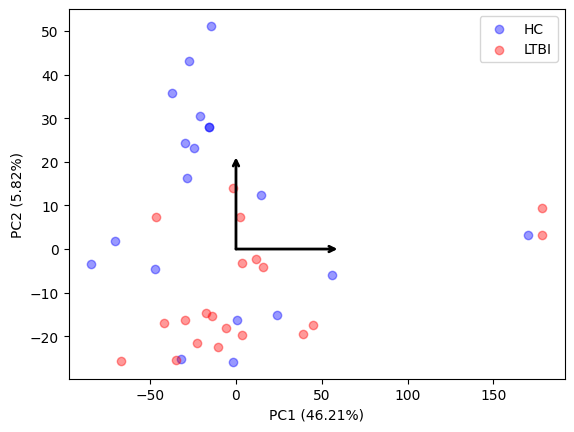

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_HC'), 0],
          HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_HC'), 1], alpha=0.4,c='b', label="HC")
ax.scatter(HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_LTBI'), 0],
          HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_LTBI'), 1], alpha=0.4,c='r', label='LTBI')



# Drawing the PC1 vector length proportional to the explained variance
draw_vector([0, 0], [np.sqrt(HCLTBIPCA.explained_variance_[0]), 0], ax=ax)
# Drawing the PC2 vector length proportional to the explained variance
draw_vector([0, 0], [0, np.sqrt(HCLTBIPCA.explained_variance_[1])], ax=ax)

ax.set_xlabel('PC1 ({0:.2f}%)'.format(HCLTBIPCA.explained_variance_ratio_[0]*100))
ax.set_ylabel('PC2 ({0:.2f}%)'.format(HCLTBIPCA.explained_variance_ratio_[1]*100))

plt.legend(loc="best")
plt.show()

## Plotting PCA with Genes of Interest (most strongly associated with PC1)

ETV6
C17orf50
SEPT3
CRHR2
CYP4F30P


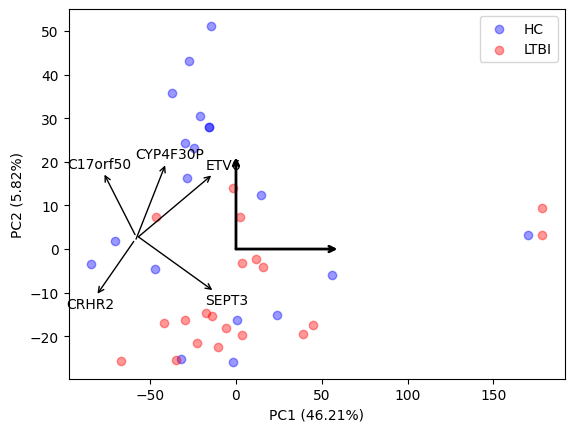

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def draw_vector(v0, v1, ax=None):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_HC'), 0],
          HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_HC'), 1], alpha=0.4,c='b', label="HC")
ax.scatter(HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_LTBI'), 0],
          HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_LTBI'), 1], alpha=0.4,c='r', label='LTBI')

# Drawing the PC1 vector length proportional to the explained variance
draw_vector([0, 0], [np.sqrt(HCLTBIPCA.explained_variance_[0]), 0], ax=ax)
# Drawing the PC2 vector length proportional to the explained variance
draw_vector([0, 0], [0, np.sqrt(HCLTBIPCA.explained_variance_[1])], ax=ax)

ax.set_xlabel('PC1 ({0:.2f}%)'.format(HCLTBIPCA.explained_variance_ratio_[0] * 100))
ax.set_ylabel('PC2 ({0:.2f}%)'.format(HCLTBIPCA.explained_variance_ratio_[1] * 100))

plt.legend(loc="best")

# Linear transformation for PC1 and PC2, weighted by the proportion of variation explained
pc1_loadings = HCLTBIPCA.components_[0, :].T
pc1_weighted_loadings = pc1_loadings * HCLTBIPCA.explained_variance_[0]

# Assuming the gene names are the column names of the data DataFrame, excluding the 'Transcript_ID'
gene_names_of_interest = data.columns[1:]

# Get the top genes across both PCs (sum of absolute loadings)
n_top_genes = 5
top_pc1_gene_idxs = np.argsort(np.abs(pc1_weighted_loadings))[-n_top_genes:]

# Annotate each top gene at a different offset to avoid overlap
offsets = [(50, 50), (-50, 50), (50, -50), (-50, -50), (0, 60)]
for gene_idx, offset in zip(top_pc1_gene_idxs, offsets):
    print(gene_names_of_interest[gene_idx])
    ax.annotate(text=gene_names_of_interest[gene_idx],
                xy=[HCLTBIPCA.components_.T[gene_idx, 0] * HCLTBIPCA.explained_variance_[0],
                    HCLTBIPCA.components_.T[gene_idx, 1] * HCLTBIPCA.explained_variance_[1]],
                xytext=(offset[0], offset[1]),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='<-', linewidth=1, shrinkA=0.9))

plt.show()


## Plotting PCA with Genes of Interest (most strongly associated with PC2)

AKIRIN2-AS1
C3orf22
CALCB
FLNC
DEFB115


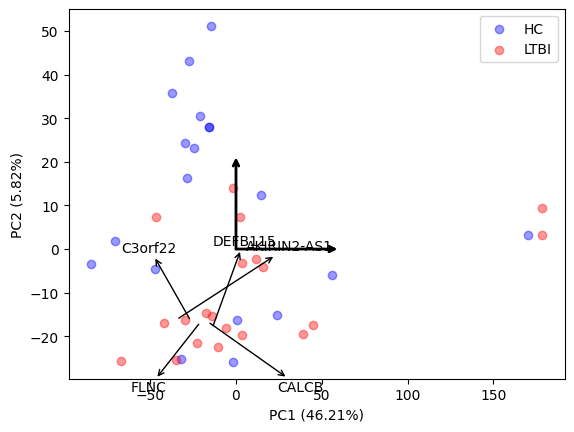

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def draw_vector(v0, v1, ax=None):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_HC'), 0],
           HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_HC'), 1], alpha=0.4, c='b', label="HC")
ax.scatter(HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_LTBI'), 0],
           HCLTBI_pca_data[HCLTBI_metadata.index.str.contains('CD4_LTBI'), 1], alpha=0.4, c='r', label='LTBI')

# Drawing the PC1 vector length proportional to the explained variance
draw_vector([0, 0], [np.sqrt(HCLTBIPCA.explained_variance_[0]), 0], ax=ax)
# Drawing the PC2 vector length proportional to the explained variance
draw_vector([0, 0], [0, np.sqrt(HCLTBIPCA.explained_variance_[1])], ax=ax)

ax.set_xlabel('PC1 ({0:.2f}%)'.format(HCLTBIPCA.explained_variance_ratio_[0] * 100))
ax.set_ylabel('PC2 ({0:.2f}%)'.format(HCLTBIPCA.explained_variance_ratio_[1] * 100))

plt.legend(loc="best")

# Linear transformation for PC2, weighted by the proportion of variation explained
pc2_loadings = HCLTBIPCA.components_[1, :].T
pc2_weighted_loadings = pc2_loadings * HCLTBIPCA.explained_variance_[1]

# Assuming the gene names are the column names of the data DataFrame, excluding the 'Transcript_ID'
gene_names_of_interest = data.columns[1:]

# Get the top genes for PC2 (sum of absolute loadings)
n_top_genes = 5
top_pc2_gene_idxs = np.argsort(np.abs(pc2_weighted_loadings))[-n_top_genes:]

# Annotate each top gene at a different offset to avoid overlap
offsets = [(50, 50), (-50, 50), (50, -50), (-50, -50), (0, 60)]
for gene_idx, offset in zip(top_pc2_gene_idxs, offsets):
    print(gene_names_of_interest[gene_idx])
    ax.annotate(text=gene_names_of_interest[gene_idx],
                xy=[HCLTBIPCA.components_.T[gene_idx, 0] * HCLTBIPCA.explained_variance_[0],
                    HCLTBIPCA.components_.T[gene_idx, 1] * HCLTBIPCA.explained_variance_[1]],
                xytext=(offset[0], offset[1]),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='<-', linewidth=1, shrinkA=0.9))

plt.show()
